In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [5]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [6]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [7]:
fraud

,undergrad,marital,population,experience,urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass
  

In [9]:
#slippting data into labels and features
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [10]:
#Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [14]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

model.estimators_
model.classes_
model.n_features_
model.n_classes_

model.n_outputs_

model.oob_score_

0.7

In [15]:
prediction = model.predict(x_train)

In [16]:
prediction

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [18]:
accuracy

0.9958333333333333

In [19]:
np.mean(prediction == y_train)

0.9958333333333333

In [21]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [22]:
pred_test = model.predict(x_test)

In [23]:
acc_test =accuracy_score(y_test,pred_test)

In [24]:
acc_test

0.7666666666666667

In [26]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=8f093fbbc0d58901cead1e5a51aa316e50da191899b07c975fdada7b43800f29
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [36]:
!pip install six

In [37]:
!pip install --upgrade scikit-learn==0.20.3

  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to d:\farhat\lib\site-packages\scikit_learn-0.24.1.dist-info\
   from D:\Farhat\Lib\site-packages\~cikit_learn-0.24.1.dist-info
  Moving to d:\farhat\lib\site-packages\sklearn\
   from D:\Farhat\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'D:\Farhat\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-e5lxsxub\\scikit-learn_ff5cc17d3c874ebc9065ecf1f7ae36d9\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-e5lxsxub\\scikit-learn_ff5cc17d3c874ebc9065ecf1f7ae36d9\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-5uh795n2'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-e5lxsxub\scikit-learn_ff5cc17d3c874ebc9065ecf1f7ae36d9\
  Complete output (675 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries 

    creating build\lib.win-amd64-3.8\sklearn\covariance
    copying sklearn\covariance\elliptic_envelope.py -> build\lib.win-amd64-3.8\sklearn\covariance
    copying sklearn\covariance\empirical_covariance_.py -> build\lib.win-amd64-3.8\sklearn\covariance
    copying sklearn\covariance\graph_lasso_.py -> build\lib.win-amd64-3.8\sklearn\covariance
    copying sklearn\covariance\robust_covariance.py -> build\lib.win-amd64-3.8\sklearn\covariance
    copying sklearn\covariance\shrunk_covariance_.py -> build\lib.win-amd64-3.8\sklearn\covariance
    copying sklearn\covariance\__init__.py -> build\lib.win-amd64-3.8\sklearn\covariance
    creating build\lib.win-amd64-3.8\sklearn\covariance\tests
    copying sklearn\covariance\tests\test_covariance.py -> build\lib.win-amd64-3.8\sklearn\covariance/tests
    copying sklearn\covariance\tests\test_elliptic_envelope.py -> build\lib.win-amd64-3.8\sklearn\covariance/tests
    copying sklearn\covariance\tests\test_graphical_lasso.py -> build\lib.win-am

    copying sklearn\datasets\lfw.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\mlcomp.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\mldata.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\olivetti_faces.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\openml.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\rcv1.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\samples_generator.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\setup.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\species_distributions.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\svmlight_format.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\twenty_newsgroups.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\__init__.p

In [38]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [39]:
tree = model.estimators_[5]

In [40]:
tree

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=70117798)

In [41]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [42]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [45]:
from sklearn.tree import  DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

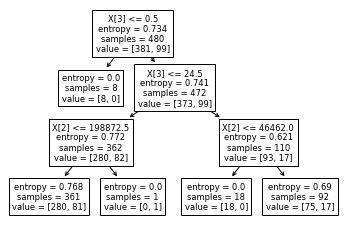

In [47]:
from sklearn import tree
tree.plot_tree(model);

In [49]:
colnames = list(fraud.columns)
colnames

['undergrad', 'marital', 'population', 'experience', 'urban', 'income']

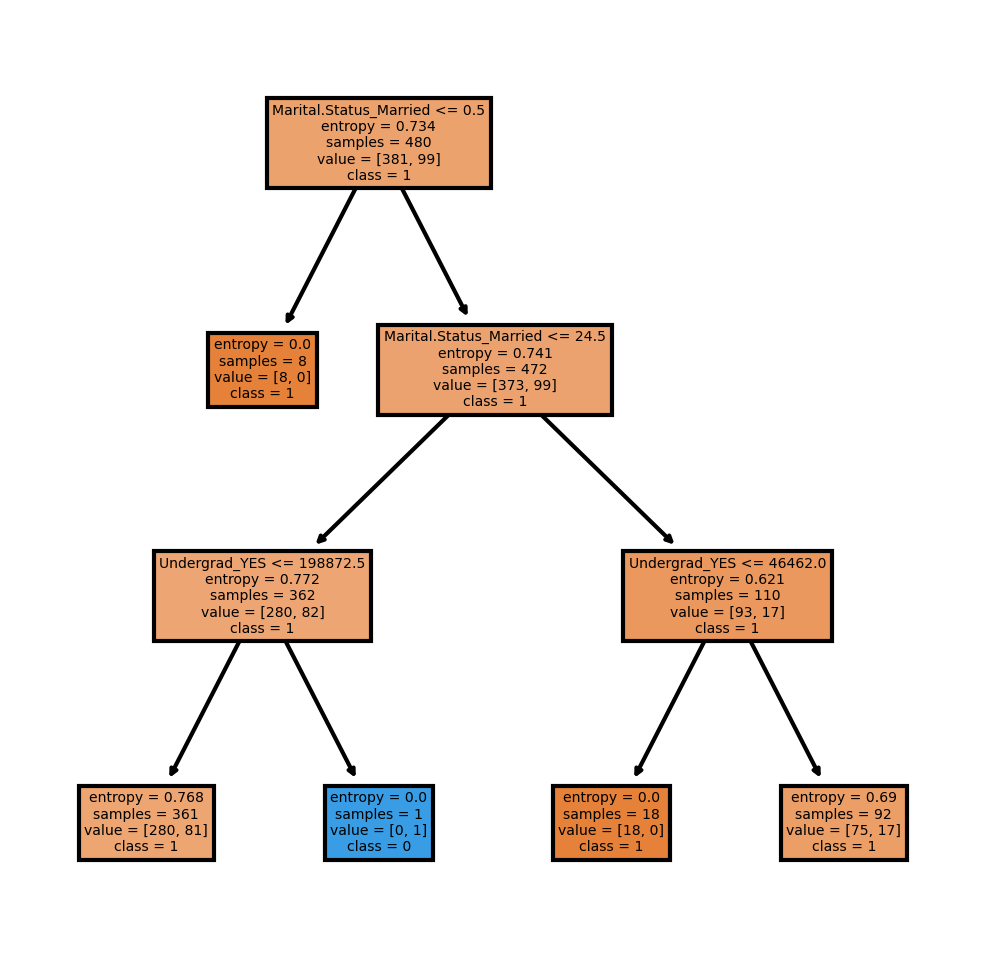

In [51]:
import matplotlib.pyplot as plt
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [52]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [53]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
pd.crosstab(y_test,preds)

col_0,0
income,
0,95
1,25


In [55]:
np.mean(preds==y_test)

0.7916666666666666

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [57]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7916666666666666

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [63]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
model.score(X_test,y_test)

-1.3084463910649018